Comcast Telecom Consumer Complaints

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

Data Dictionary

Ticket #: Ticket number assigned to each complaint
Customer Complaint: Description of complaint
Date: Date of complaint
Time: Time of complaint
Received Via: Mode of communication of the complaint
City: Customer city
State: Customer state
Zipcode: Customer zip
Status: Status of complaint
Filing on behalf of someone
Analysis Task

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Which state has the maximum complaints
Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.

In [ ]:
import pandas as pd
import numpy as np

In [118]:
#Read File into DF
data = pd.read_csv("C:\\Users\\adity\\OneDrive\\Documents\\Data Science\\Data Science With Python\\Live class\\1568699544_comcast_telecom_complaints_data\\Comcast_telecom_complaints_data.csv")

In [119]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [120]:
#Change Date Column to DateTime Format
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [121]:
#Find the number of complaints raised in each month
data['Month'] = pd.DatetimeIndex(data['Date']).month
data2 = data[['Ticket #', 'Month']].copy()
data3=data2.groupby("Month")
count4 = data3.get_group(4)['Ticket #'].count()
count5 = data3.get_group(5)['Ticket #'].count()
count6 = data3.get_group(6)['Ticket #'].count()

df = pd.DataFrame({'Month':[4,5,6],'Count':[count4,count5,count6]})
df

,Month,Count
0,4,545
1,5,399
2,6,1280


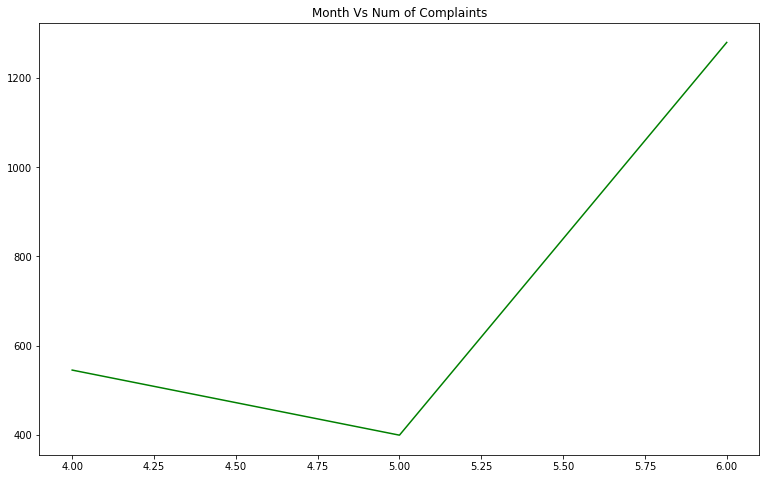

In [122]:
#Plot Month VS Num Of Complaints Raised in that month
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_axes([0,0,1,1])
ax1.set_title('Month Vs Num of Complaints')
ax1.plot(df['Month'],df['Count'],color='green')

In [123]:
#Find Number Of complaints raised on each day
data_days = data.groupby('Date')
days = list(data_days.groups)
count = data_days['Date'].count()
count = count.tolist()
df1 = pd.DataFrame({'Days':days,'Count':count})
df1

,Days,Count
0,2015-04-01,18
1,2015-04-02,27
2,2015-04-03,15
3,2015-04-04,12
4,2015-04-05,6
...,...,...
86,2015-06-26,55
87,2015-06-27,39
88,2015-06-28,27
89,2015-06-29,51


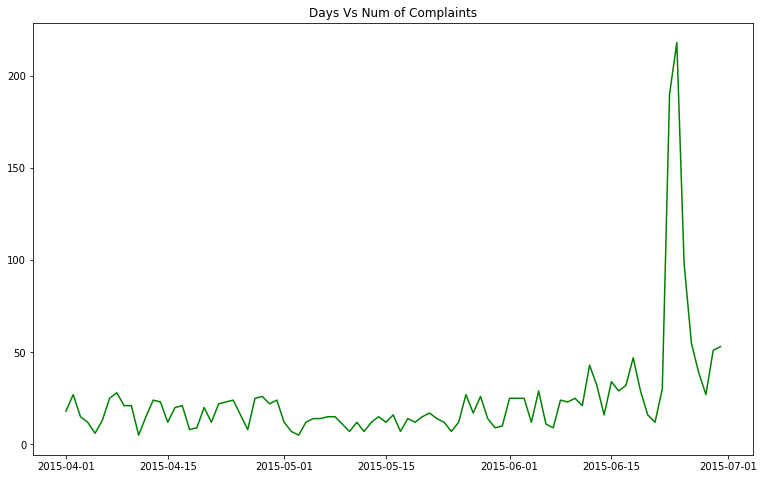

In [134]:
#Plot Day VS Num of complaints raised on that day
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_axes([0,0,1,1])
ax1.set_title('Days Vs Num of Complaints')
ax1.plot(df1['Days'],df1['Count'],color='green')

In [10]:
data.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone', 'Month'],
      dtype='object')

In [11]:
data["Status"]

0       Closed
1       Closed
2       Closed
3         Open
4       Solved
         ...  
2219    Closed
2220    Solved
2221    Solved
2222    Solved
2223      Open
Name: Status, Length: 2224, dtype: object

In [12]:
#Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed
def change_status (row):
   if row['Status'] == 'Closed' or row['Status'] == 'Solved' :
      return 'Closed'
   elif row['Status'] == 'Open' or row['Status'] == 'Pending' :
      return 'Open'

data['Tkt_Status'] = data.apply (lambda row: change_status(row), axis=1)
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Tkt_Status
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Closed
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,Closed
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,Open
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,Closed


In [13]:
Status_DF = pd.DataFrame({'State':data['State'],'Status':data['Tkt_Status']})
Status_DF.head()

,State,Status
0,Maryland,Closed
1,Georgia,Closed
2,Georgia,Closed
3,Georgia,Open
4,Georgia,Closed


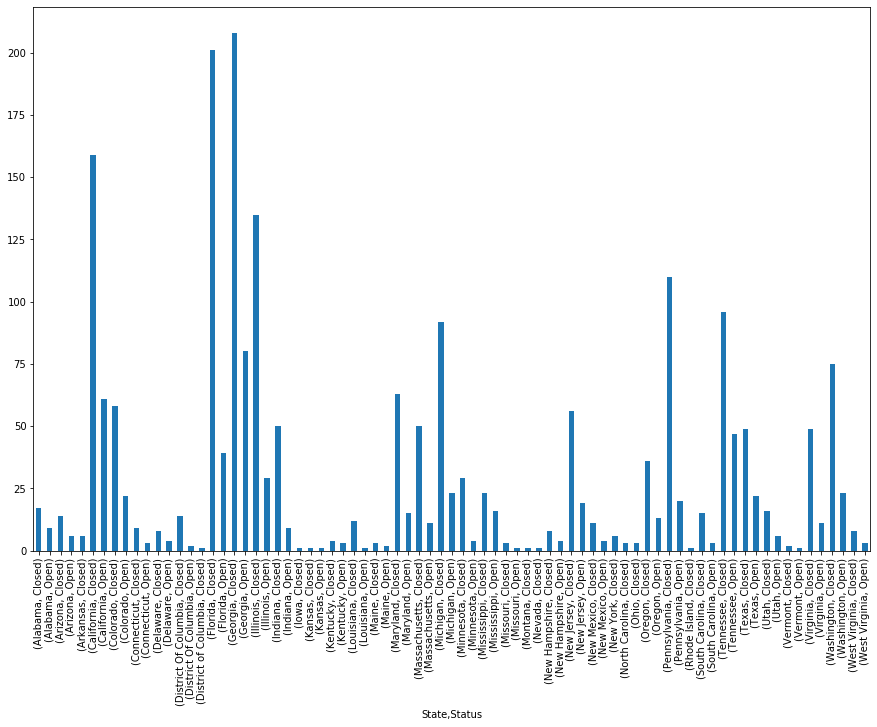

In [14]:
#Group by state and status and plot a bar chart for the same
df1 = Status_DF.groupby(['State', 'Status']).size()
plt.figure(figsize=(15,10))
df1.plot.bar()

In [76]:
Complaints_DF = pd.DataFrame({'State':data['State'],'Ticket #':data['Ticket #'],'Status':data['Tkt_Status']})
Complaints_DF

,State,Ticket #,Status
0,Maryland,250635,Closed
1,Georgia,223441,Closed
2,Georgia,242732,Closed
3,Georgia,277946,Open
4,Georgia,307175,Closed
...,...,...,...
2219,Florida,213550,Closed
2220,Michigan,318775,Closed
2221,Michigan,331188,Closed
2222,Michigan,360489,Closed


In [88]:
#Find the state with max complaints
state_df = Complaints_DF.groupby('State')
states = list(state_df.groups)
max = 0
max_state = ''
for state in states:
    count = state_df.get_group(state)['Ticket #'].count()
    if count > max:
        max = count
        max_state = state
print("State: "+max_state+" Count: "+str(max))

State: Georgia Count: 288


0

In [92]:
#Find the state which has max open cases
max_open_perc = 0
max_open_state = ''
for state in states:
    count = state_df.get_group(state)['Ticket #'].count()
    open_count = state_df.get_group(state)[state_df.get_group(state)['Status']=="Open"]['Status'].count()
    open_perc = (open_count*100)/count
    if open_perc > max_open_perc:
        max_open_perc = open_perc
        max_open_state = state
print("max_open_state: "+ max_open_state+ " max_open_perc: "+ str(max_open_perc))

max_open_state: Kansas max_open_perc: 50.0


In [102]:
#find % of tkts resolved which were raised via Internet
#find % of tkts resolved which were raised via call
Received_Via_DF = pd.DataFrame({'Ticket #':data['Ticket #'],'Received Via':data['Received Via'],'Status':data['Tkt_Status']})
Received_Via_DF
rcvia_df = Received_Via_DF.groupby('Received Via')
Internet_Tkt_Count = rcvia_df.get_group('Internet')['Ticket #'].count()
Internet_Tkt_Res_Count = rcvia_df.get_group('Internet')[rcvia_df.get_group('Internet')['Status']=="Closed"]['Status'].count()
CC_Tkt_Count = rcvia_df.get_group('Customer Care Call')['Ticket #'].count()
CC_Tkt_Res_Count = rcvia_df.get_group('Internet')[rcvia_df.get_group('Internet')['Status']=="Closed"]['Status'].count()
print("% Tkt Raised Via Internet Resolved "+str((Internet_Tkt_Res_Count*100)/Internet_Tkt_Count))
print("% Tkt Raised Via CC Call Resolved "+str((CC_Tkt_Res_Count*100)/CC_Tkt_Count))

% Tkt Raised Via Internet Resolved 76.289592760181
% Tkt Raised Via CC Call Resolved 75.33512064343164


In [112]:
#Add a new column which describes the type of issue (Internet/Network Issues or other)
def get_type (row):
   if ("internet" in row['Customer Complaint'].lower()) or ("speed" in row['Customer Complaint'].lower()) or ("network" in row['Customer Complaint'].lower()):
      return 'Internet/Network Issues'
   else:
      return "Other"

data['Complaint_Type'] = data.apply (lambda row: get_type(row), axis=1)
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Tkt_Status,Complaint_Type
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Closed,Internet/Network Issues
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,Closed,Other
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,Closed,Internet/Network Issues
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,Open,Other
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,Closed,Other


In [115]:
#Find the number of tkts raised for each category of issue
Complaints_Type_DF = pd.DataFrame({'Ticket #':data['Ticket #'],'Complaint_Type':data['Complaint_Type']})
group_by_Type_df = Complaints_Type_DF.groupby('Complaint_Type')
num_of_internet_related_complaints = group_by_Type_df.get_group("Internet/Network Issues")['Complaint_Type'].count()
other_complaints = group_by_Type_df.get_group("Other")['Complaint_Type'].count()
comp_df = pd.DataFrame({'Type':['Internet/Network Issues','Other'],'Count':[num_of_internet_related_complaints,other_complaints]})
comp_df

,Type,Count
0,Internet/Network Issues,619
1,Other,1605
